# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator.
* There is no strong relationship between latitude and cloudiness.
* There is no strong relationship between latitude and wind speed.

In [5]:
!pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=85abce8bfd9debac51eecf350843a4ac808ed46d70813951e9951519bdb45dab
  Stored in directory: /Users/lgrayes/Library/Caches/pip/wheels/eb/07/14/1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [7]:
# Import API key
from api_keys import weather_api_key

In [8]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_longs and cities
lat_longs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, long combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

## Perform API Calls

In [10]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2e7be3fbf6a6ca5ee22f83c7998246c"

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | sao felix do xingu
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | mundo nuevo
Processing Record 8 of Set 1 | auki
Processing Record 9 of Set 1 | kidal
Processing Record 10 of Set 1 | sayyan
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | mezhdurechensk
Processing Record 16 of Set 1 | bubaque
Processing Record 17 of Set 1 | guano
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | bowen
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | belushya guba
City not found. Skipping...
Pr

Processing Record 35 of Set 4 | olafsvik
Processing Record 36 of Set 4 | magadi
Processing Record 37 of Set 4 | palmer
Processing Record 38 of Set 4 | vetluga
Processing Record 39 of Set 4 | manzil salim
Processing Record 40 of Set 4 | araxa
Processing Record 41 of Set 4 | broken hill
Processing Record 42 of Set 4 | calama
Processing Record 43 of Set 4 | zeya
Processing Record 44 of Set 4 | roma
Processing Record 45 of Set 4 | coahuayana
Processing Record 46 of Set 4 | ahipara
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | imbituba
Processing Record 0 of Set 5 | rungata
City not found. Skipping...
Processing Record 1 of Set 5 | kishtwar
Processing Record 2 of Set 5 | srednekolymsk
Processing Record 3 of Set 5 | dingle
Processing Record 4 of Set 5 | vostok
Processing Record 5 of Set 5 | general roca
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | mergui
City not found. 

Processing Record 21 of Set 8 | liuzhou
Processing Record 22 of Set 8 | moba
Processing Record 23 of Set 8 | tiarei
Processing Record 24 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 25 of Set 8 | baie-comeau
Processing Record 26 of Set 8 | port-cartier
Processing Record 27 of Set 8 | san quintin
Processing Record 28 of Set 8 | camalu
Processing Record 29 of Set 8 | luanda
Processing Record 30 of Set 8 | upington
Processing Record 31 of Set 8 | puerto narino
Processing Record 32 of Set 8 | souillac
Processing Record 33 of Set 8 | mahebourg
Processing Record 34 of Set 8 | rancho veloz
Processing Record 35 of Set 8 | geraldton
Processing Record 36 of Set 8 | adrar
Processing Record 37 of Set 8 | high level
Processing Record 38 of Set 8 | ban nahin
Processing Record 39 of Set 8 | talara
Processing Record 40 of Set 8 | port lincoln
Processing Record 41 of Set 8 | dhidhdhoo
Processing Record 42 of Set 8 | fairbanks
Processing Record 43 of Set 8 | ruatoria
City not fo

Processing Record 12 of Set 12 | paamiut
Processing Record 13 of Set 12 | coulihaut
City not found. Skipping...
Processing Record 14 of Set 12 | nazare
Processing Record 15 of Set 12 | batemans bay
Processing Record 16 of Set 12 | oneida
Processing Record 17 of Set 12 | ewo
Processing Record 18 of Set 12 | mattru
Processing Record 19 of Set 12 | ostersund
Processing Record 20 of Set 12 | necochea
Processing Record 21 of Set 12 | birjand
Processing Record 22 of Set 12 | bossembele
City not found. Skipping...
Processing Record 23 of Set 12 | inirida
Processing Record 24 of Set 12 | utiroa
City not found. Skipping...
Processing Record 25 of Set 12 | kirakira
Processing Record 26 of Set 12 | tunduru
City not found. Skipping...
Processing Record 27 of Set 12 | palanga
Processing Record 28 of Set 12 | yolombo
Processing Record 29 of Set 12 | solnechnyy
Processing Record 30 of Set 12 | samusu
City not found. Skipping...
Processing Record 31 of Set 12 | galiwinku
City not found. Skipping...
Pr

In [15]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,76.14,80,84,12.08,PF,1606686810
1,georgetown,5.41,100.34,78.80,94,20,2.24,MY,1606686795
2,sao felix do xingu,-6.64,-51.99,78.51,75,100,0.98,BR,1606686810
3,longyearbyen,78.22,15.64,17.60,57,75,9.17,SJ,1606686811
4,lavrentiya,65.58,-171.00,14.70,93,3,12.66,RU,1606686811
...,...,...,...,...,...,...,...,...,...
530,svetlogorsk,52.63,29.73,30.33,97,86,7.40,BY,1606686881
531,boali,4.80,18.13,76.03,44,51,1.68,CF,1606686882
532,korsakov,46.63,142.78,14.00,92,40,2.24,RU,1606686882
533,hearst,49.68,-83.67,19.40,85,100,6.93,CA,1606686882


In [13]:
# Show Record Count
city_data_pd.count()

City          535
Lat           535
Lng           535
Max Temp      535
Humidity      535
Cloudiness    535
Wind Speed    535
Country       535
Date          535
dtype: int64

In [14]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,76.14,80,84,12.08,PF,1606686810
1,georgetown,5.41,100.34,78.80,94,20,2.24,MY,1606686795
2,sao felix do xingu,-6.64,-51.99,78.51,75,100,0.98,BR,1606686810
3,longyearbyen,78.22,15.64,17.60,57,75,9.17,SJ,1606686811
4,lavrentiya,65.58,-171.00,14.70,93,3,12.66,RU,1606686811


## Inspect the data and remove the cities where the humidity > 100%.
----


In [16]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.000000,535.000000,535.000000,535.00000,535.000000,535.000000,5.350000e+02
mean,18.661963,15.744150,53.743121,74.20000,51.338318,7.939533,1.606687e+09
std,33.589603,91.577495,26.314626,19.97159,40.169392,5.954710,5.817714e+01
min,-54.800000,-175.200000,-16.600000,8.00000,0.000000,0.450000,1.606687e+09
25%,-8.505000,-67.565000,35.600000,66.00000,2.500000,3.360000,1.606687e+09
50%,21.250000,18.420000,60.010000,79.00000,52.000000,6.580000,1.606687e+09
75%,47.735000,98.730000,76.515000,89.00000,92.500000,10.290000,1.606687e+09
max,78.220000,178.420000,93.940000,100.00000,100.000000,30.960000,1.606687e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,76.14,80,84,12.08,PF,1606686810
1,georgetown,5.41,100.34,78.80,94,20,2.24,MY,1606686795
2,sao felix do xingu,-6.64,-51.99,78.51,75,100,0.98,BR,1606686810
3,longyearbyen,78.22,15.64,17.60,57,75,9.17,SJ,1606686811
4,lavrentiya,65.58,-171.00,14.70,93,3,12.66,RU,1606686811


In [19]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs. Temperature Plot

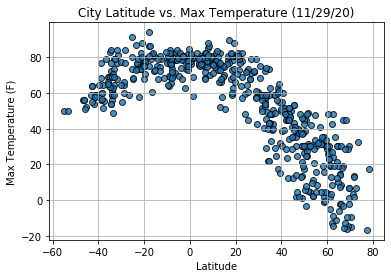

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

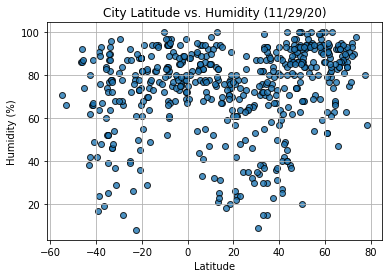

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

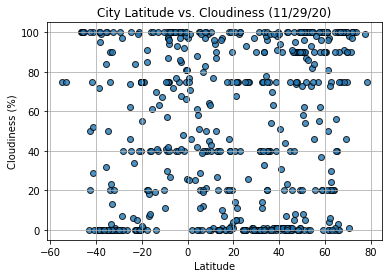

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

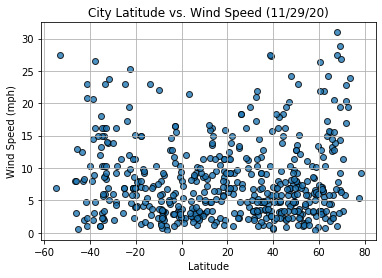

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [25]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

In [27]:
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,georgetown,5.41,100.34,78.80,94,20,2.24,MY,1606686795
3,longyearbyen,78.22,15.64,17.60,57,75,9.17,SJ,1606686811
4,lavrentiya,65.58,-171.00,14.70,93,3,12.66,RU,1606686811
6,mundo nuevo,18.70,-95.50,78.57,78,0,9.55,MX,1606686811
8,kidal,18.44,1.41,73.00,20,40,8.61,ML,1606686811
...,...,...,...,...,...,...,...,...,...
530,svetlogorsk,52.63,29.73,30.33,97,86,7.40,BY,1606686881
531,boali,4.80,18.13,76.03,44,51,1.68,CF,1606686882
532,korsakov,46.63,142.78,14.00,92,40,2.24,RU,1606686882
533,hearst,49.68,-83.67,19.40,85,100,6.93,CA,1606686882


In [28]:
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,76.14,80,84,12.08,PF,1606686810
2,sao felix do xingu,-6.64,-51.99,78.51,75,100,0.98,BR,1606686810
5,ushuaia,-54.80,-68.30,50.00,71,75,6.93,AR,1606686535
7,auki,-8.77,160.70,80.71,80,97,4.92,SB,1606686811
10,lebu,-37.62,-73.65,55.69,67,0,26.60,CL,1606686811
...,...,...,...,...,...,...,...,...,...
512,batemans bay,-35.72,150.18,64.99,83,84,1.01,AU,1606686879
514,ewo,-0.87,14.82,75.07,72,66,2.89,CG,1606686879
517,necochea,-38.55,-58.74,60.01,64,72,20.69,AR,1606686879
520,kirakira,-10.45,161.92,83.01,72,100,7.58,SB,1606686880


###  Max Temp vs. Latitude Linear Regression

The r-value is: 0.7589406740252869


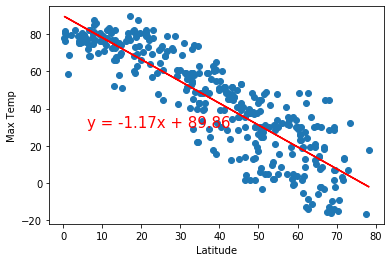

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.38232012059162207


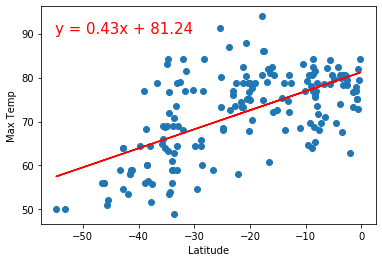

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation. 

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07206090396150244


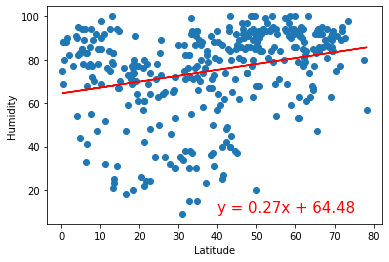

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.09678074943601803


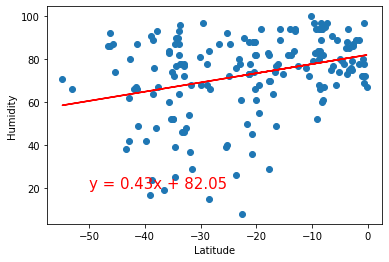

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05135192650064876


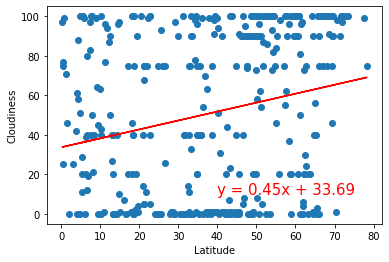

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.08766796965010143


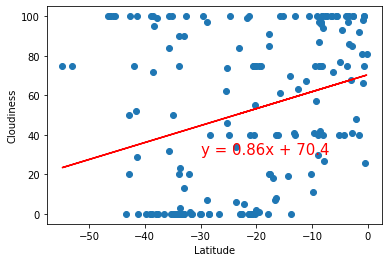

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.031391370362441905


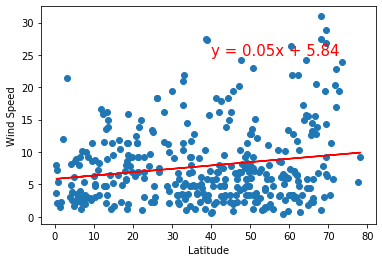

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.07535361096076204


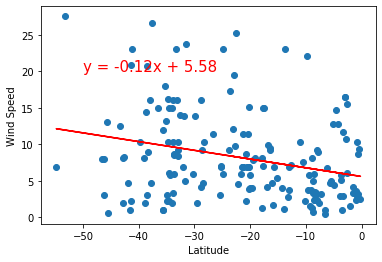

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.